# Toronto House Price Analysis Based on Amenities

In [1]:
# import packages/libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [152]:
# https://www.kaggle.com/datasets/rajacsp/toronto-apartment-price?resource=download
# load data
TorontoHousing_df = pd.read_csv("DataFiles\Toronto_apartment_rentals_2018.csv")
TorontoHousing_df.head(12)

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00"
5,1,1.0,0,"87 Jameson Avenue, Toronto, ON, M6K 2W8",43.634890,-79.434654,"$1,729.00"
6,2,1.0,0,"700 Ross Street, Burlington, ON, L7S 1S2",43.328986,-79.808618,"$1,685.00"
7,1,1.0,0,"25 Telegram Mews, Toronto, ON, M5V 3Z2",43.640918,-79.393982,"$1,900.00"
8,1,1.0,0,"560 Front St W, toronto, ON, M5V 0L5",43.641308,-79.400093,"$1,900.00"
9,1,1.0,1,"70 Queens Wharf Rd 33rd Floor, Toronto, ON M5V...",43.640068,-79.399960,"$2,400.00"


In [153]:
# Inspect data dimensions
TorontoHousing_df.shape

(1124, 7)

## Data Cleaning

### Duplicates

In [154]:
# Check for duplicated rows.
duplicate_count = TorontoHousing_df.duplicated().sum()
print(duplicate_count)

308


In [155]:
# Inspect / View duplicates
TorontoHousing_df[TorontoHousing_df.duplicated()].sort_values(by=['Bedroom', 'Bathroom', 'Den', 'Address', 'Price'])

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
254,1,1.0,0,"# Dundas st w, Denison ave and Dundas st w M5T...",43.652043,-79.402242,"$1,300.00"
386,1,1.0,0,"# Dundas st w, Denison ave and Dundas st w M5T...",43.652043,-79.402242,"$1,300.00"
232,1,1.0,0,", DOWNTOWN M5V 4A9 ON, Canada",43.640402,-79.397147,"$2,100.00"
365,1,1.0,0,", DOWNTOWN M5V 4A9 ON, Canada",43.640402,-79.397147,"$2,100.00"
460,1,1.0,0,", DOWNTOWN M5V 4A9 ON, Canada",43.640402,-79.397147,"$2,100.00"
...,...,...,...,...,...,...,...
418,3,1.5,0,"19 Sudbury St, Toronto, ON M6J 3W6, Canada",43.641109,-79.419448,"$3,450.00"
214,3,1.5,0,"2304 Weston Road, Toronto, ON, M9N 1Z3",43.705123,-79.530091,"$2,050.00"
345,3,1.5,0,"2304 Weston Road, Toronto, ON, M9N 1Z3",43.705123,-79.530091,"$2,050.00"
402,3,2.0,0,", M5V 2G4, Toronto, ON",43.646764,-79.392221,"$3,200.00"


In [156]:
# drop duplicate rows
df_cleaned = TorontoHousing_df.drop_duplicates().copy()

In [157]:
# Confirm duplicate rows were dropped
duplicate_count = df_cleaned.duplicated().sum()
print(duplicate_count)

0


### Missing Values

In [158]:
# Check for missing values.
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Bedroom     0
Bathroom    0
Den         0
Address     0
Lat         0
Long        0
Price       0
dtype: int64


### Data Types

In [159]:
# Check columns data types
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 1123
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bedroom   816 non-null    int64  
 1   Bathroom  816 non-null    float64
 2   Den       816 non-null    int64  
 3   Address   816 non-null    object 
 4   Lat       816 non-null    float64
 5   Long      816 non-null    float64
 6   Price     816 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 51.0+ KB


In [160]:
df_cleaned.Price.head(12)

0     $2,450.00
1     $2,150.00
2     $1,950.00
3     $2,900.00
4     $1,800.00
5     $1,729.00
6     $1,685.00
7     $1,900.00
8     $1,900.00
9     $2,400.00
10    $1,750.00
11    $2,000.00
Name: Price, dtype: object

Remove the characters '$' and ',' from the ``Price`` variable.  
Then convert the variable into a ``float`` data type

In [161]:
# Remove non-numeric values, and convert to float
df_cleaned.Price = df_cleaned.Price.str.replace('$','', regex=True)
df_cleaned.Price = df_cleaned.Price.str.replace(',','', regex=True)
df_cleaned.Price = df_cleaned.Price.astype(float)

In [162]:
# Confirm data type changes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 1123
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bedroom   816 non-null    int64  
 1   Bathroom  816 non-null    float64
 2   Den       816 non-null    int64  
 3   Address   816 non-null    object 
 4   Lat       816 non-null    float64
 5   Long      816 non-null    float64
 6   Price     816 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 51.0+ KB


In [163]:
# Summary statistics
df_cleaned.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1.367647,1.239583,0.154412,43.707321,-79.497995,2873.492647
std,0.566667,0.438082,0.361565,0.683253,1.836522,18707.483551
min,1.000000,1.000000,0.000000,42.985767,-114.082215,65.000000
25%,1.000000,1.000000,0.000000,43.641617,-79.412034,1750.000000
50%,1.000000,1.000000,0.000000,43.652023,-79.387374,2100.000000
75%,2.000000,1.000000,0.000000,43.667670,-79.376923,2500.000000
max,3.000000,3.000000,1.000000,56.130366,-73.576385,535000.000000


<AxesSubplot:ylabel='Frequency'>

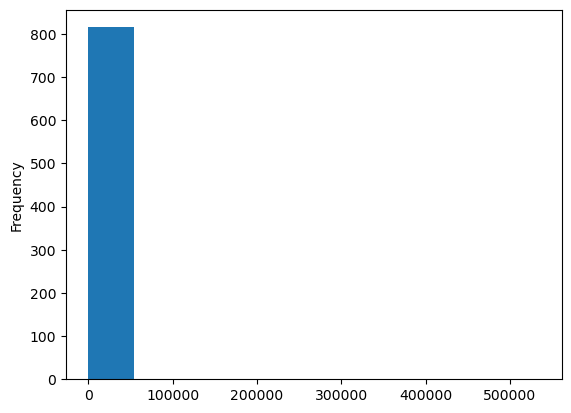

In [164]:
# Histogram - Price
df_cleaned['Price'].plot.hist()

Text(0, 0.5, 'Price')

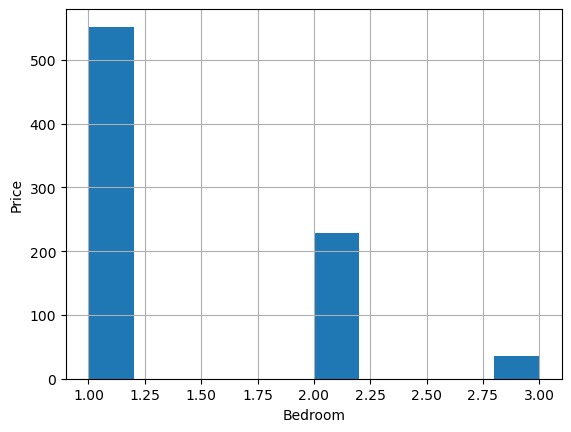

In [165]:
# Historgram Price-BedRoom
Housing_Hist = df_cleaned.Bedroom.hist()
Housing_Hist.set_xlabel('Bedroom');
Housing_Hist.set_ylabel('Price')

Text(0, 0.5, 'Price')

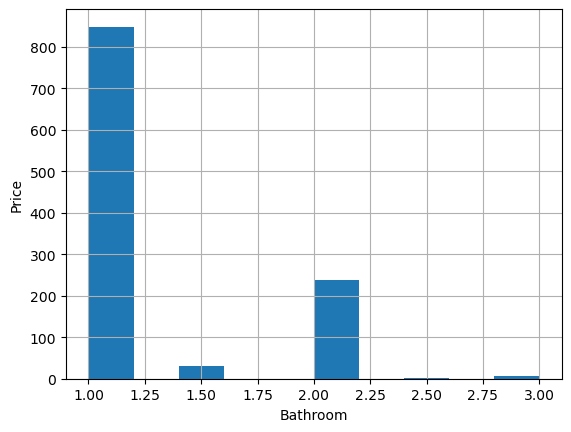

In [166]:
# Historgram Price-BathRoom

Housing_Hist = TorontoHousing_df.Bathroom.hist()
Housing_Hist.set_xlabel('Bathroom');
Housing_Hist.set_ylabel('Price')

## Detect Outliers

<AxesSubplot:xlabel='Bedroom', ylabel='Price'>

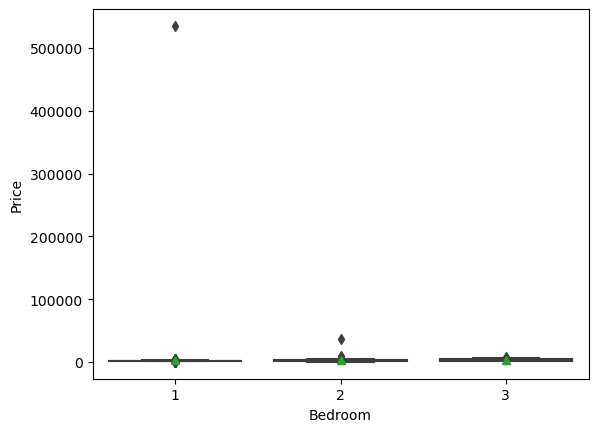

In [167]:
sns.boxplot(y=df_cleaned.Price, x=df_cleaned.Bedroom, showmeans=True)

The boxplot is showing a similar behaviour, as with the histogram. We can see a value point that is extremely distant from the the rest of the data points. Again this can be due to outlier values

#### Calculate lower and upper interquartile range
We will use these values to evaluate and remove outliers.

In [168]:
# Set q1 and q3
q1 = df_cleaned.Price.quantile(0.25)
q3 = df_cleaned.Price.quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Calculate lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print("lower: {}, upper: {}".format(lower_bound, upper_bound))

lower: 625.0, upper: 3625.0


In [169]:
# Inspect outliers
df_outliers = df_cleaned.query("Price < @lower_bound | Price > @upper_bound").sort_values(by="Price")
df_outliers.head(12)

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
816,1,2.0,0,"Euclid Ave, Toronto, ON, Canada",43.658689,-79.412577,65.0
973,1,2.0,1,"2121 Lake Shore Blvd W, Etobicoke, ON M8V 4E9,...",43.627447,-79.478374,99.0
794,1,1.0,0,"8 Wellesley St E, Toronto, ON M4Y 3B2, Canada",43.665233,-79.384293,99.0
761,1,1.0,0,", Toronro M4V 1N5 ON, Canada",43.686511,-79.399522,150.0
1110,1,1.0,0,"195 Wynford Dr, North York, ON M3C 3P3, Canada",43.723587,-79.324879,300.0
83,1,1.0,0,"89 Chestnut St, Toronto, ON M5G 1R1, Canada",43.654155,-79.385211,550.0
1049,2,1.0,0,"Bathurst St, Toronto, ON M5S 2P9, Canada",43.658278,-79.408437,600.0
1057,2,1.0,0,", Toronto M5T 0A9 ON, Canada",43.652519,-79.389078,3700.0
91,2,2.0,0,"28 Wellesley St E, Toronto, ON M4Y, Canada",43.665588,-79.383028,3700.0
644,1,1.0,0,"49 McCaul St, Toronto, ON M5T 1V7, Canada",43.651579,-79.390080,3750.0


In [170]:
# Inspect outliers
df_outliers.tail(12)

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
1031,2,2.0,0,"30 Nelson St, Toronto, ON M5V 0H5, Canada",43.649023,-79.388400,4500.0
902,3,3.0,0,"10 Glen Rd, Toronto, ON, M4X 1M5",43.671593,-79.375083,4500.0
661,3,2.0,0,"Salvador Allende Ct, Toronto, ON, M6G 0A3",43.672327,-79.428726,4625.0
654,1,1.0,0,"80 Blue Jays Way, Toronto, ON M5V 2G3, Canada",43.645297,-79.392397,4700.0
941,3,2.0,0,"14 York St, Toronto, ON M5J 0B1, Canada",43.641908,-79.381780,4900.0
1043,3,3.0,0,"397 Front St W, Toronto, ON M5V 3S1, Canada",43.642569,-79.393460,4900.0
922,3,2.0,0,", toronto M5V 3z4 ON, Canada",43.641012,-79.394948,6000.0
845,2,3.0,0,"180 University Ave, Toronto, ON M5H 0A2, Canada",43.648953,-79.385768,6500.0
1096,3,2.0,0,"21 Widmer St, Toronto, ON M5V 0B8, Canada",43.647226,-79.391100,8000.0
952,2,2.5,0,"311 Bay St, Toronto, ON M5H 4G5, Canada",43.649783,-79.380440,9750.0


#### Create a new dataframe without outliers

In [171]:
# Remove out outliers
df_withOut_ol = df_cleaned.query("Price >= @lower_bound & Price <= @upper_bound")
df_withOut_ol.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0


In [172]:
# Inspect updated data statistics
df_withOut_ol.describe()

,Bedroom,Bathroom,Den,Lat,Long,Price
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,1.338481,1.214929,0.160875,43.693862,-79.468836,2102.487773
std,0.537246,0.412602,0.367652,0.539526,1.616142,578.116565
min,1.000000,1.000000,0.000000,42.985767,-114.082215,650.000000
25%,1.000000,1.000000,0.000000,43.641579,-79.414786,1750.000000
50%,1.000000,1.000000,0.000000,43.652058,-79.387374,2100.000000
75%,2.000000,1.000000,0.000000,43.667817,-79.376562,2450.000000
max,3.000000,3.000000,1.000000,56.130366,-73.576385,3620.000000


## Visualize and Analyze

Use boxplot to visualize the ``Price`` distibution againts different variables - ``Bedroom``,``Bathroom``, and ``Den``.

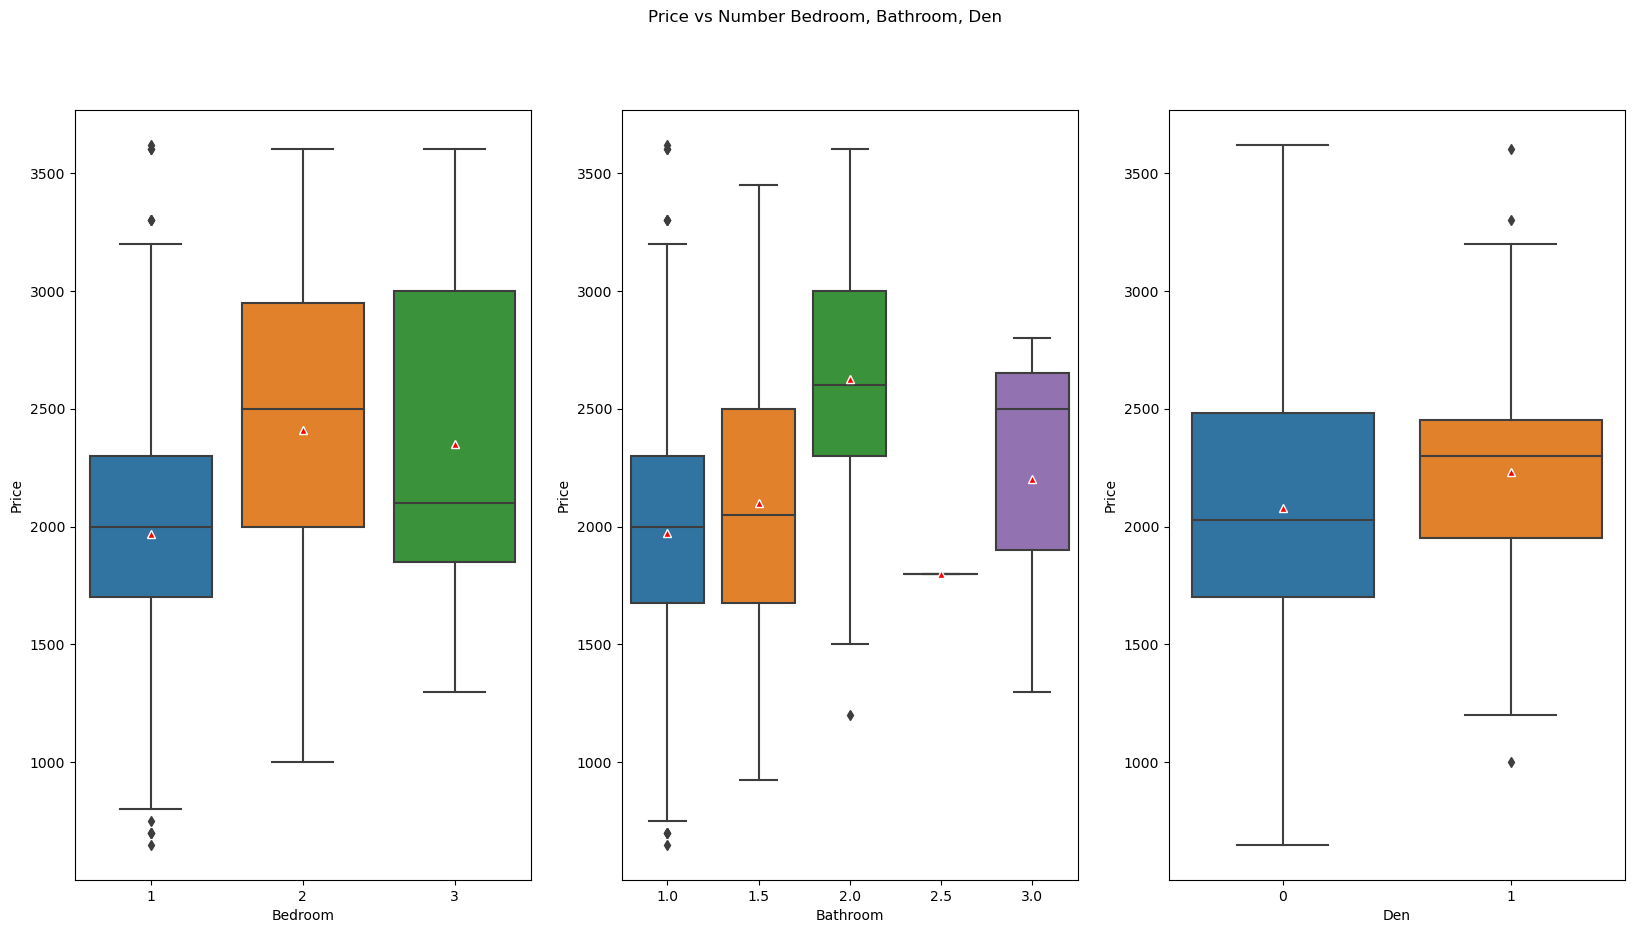

In [173]:
# Boxplots - Price vs Number Bedroom, Bathroom, Den
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle("Price vs Number Bedroom, Bathroom, Den")
meanpropsStyle = dict(markerfacecolor="red",markeredgecolor="white")
sns.boxplot(ax=axes[0], data=df_withOut_ol, x=df_withOut_ol.Bedroom, y=df_withOut_ol.Price
            , showmeans=True
            , meanprops=dict(markerfacecolor="red",markeredgecolor="white"))
sns.boxplot(ax=axes[1], data=df_withOut_ol, x=df_withOut_ol.Bathroom, y=df_withOut_ol.Price
            , showmeans=True
            , meanprops=meanpropsStyle)
sns.boxplot(ax=axes[2], data=df_withOut_ol, x=df_withOut_ol.Den, y=df_withOut_ol.Price
            , showmeans=True
            , meanprops=meanpropsStyle)
plt.show()

The boxplot shows as that:
* Price varies widely in any of the three variables. Which would mean that neither of these variables are reliable factors to price.
* Having 2 bathrooms increases mean and median price.
* There seems to have no significant advance in having a den.

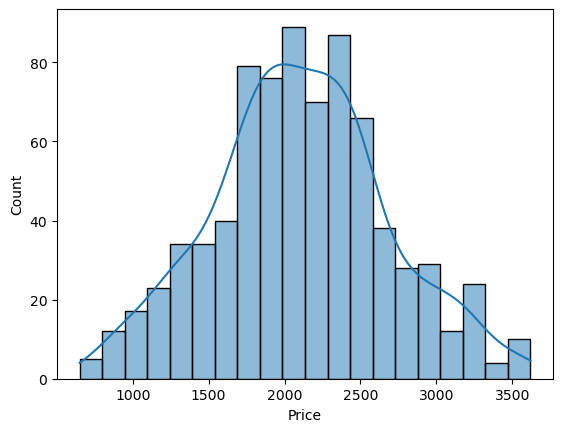

In [174]:
# Histogram of Price - without outliers
sns.histplot(x=df_withOut_ol.Price, kde=True);

The price data looks normally distributed after removing the outliers.

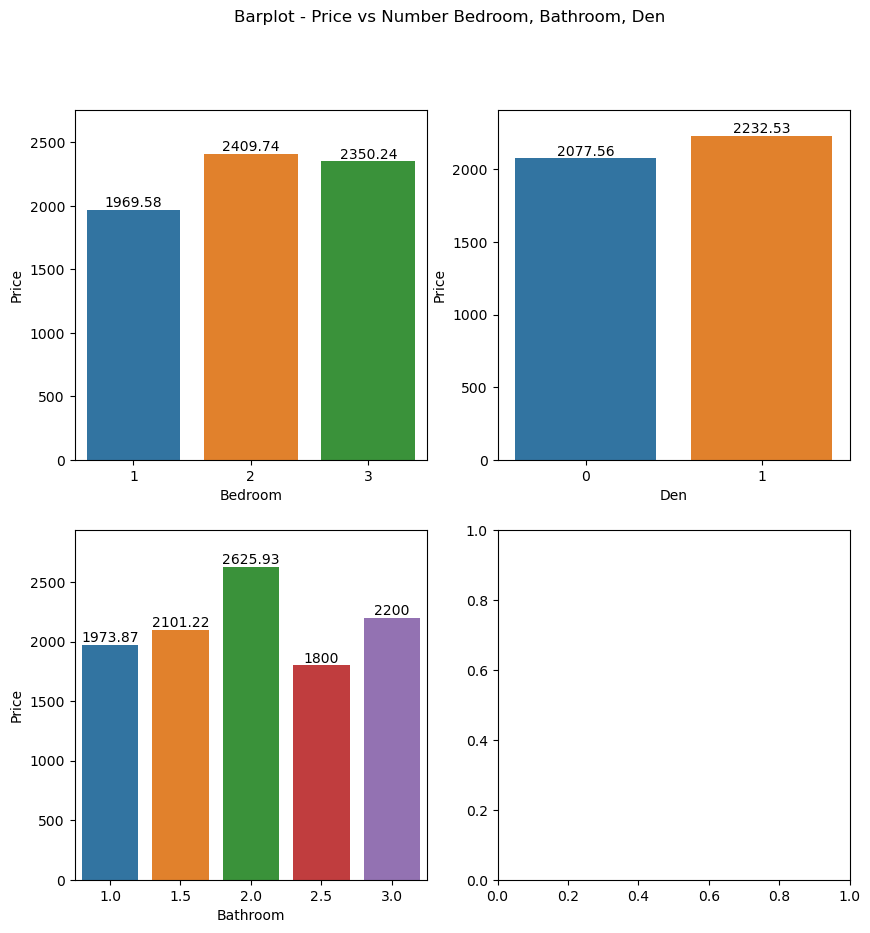

In [175]:
# Barplot - Price vs Number Bedroom, Bathroom, Den
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Barplot - Price vs Number Bedroom, Bathroom, Den")

g1 = sns.barplot(ax=axes[0,0], data=df_withOut_ol, x=df_withOut_ol.Bedroom, y=df_withOut_ol.Price, errwidth=0)
g1.bar_label(g1.containers[0])
g2 = sns.barplot(ax=axes[1,0], data=df_withOut_ol, x=df_withOut_ol.Bathroom, y=df_withOut_ol.Price, errwidth=0)
g2.bar_label(g2.containers[0])
g3 =sns.barplot(ax=axes[0,1], data=df_withOut_ol, x=df_withOut_ol.Den, y=df_withOut_ol.Price, errwidth=0)
g3.bar_label(g3.containers[0])

plt.show()

The barplot confirms some observations from our boxplot.
* 2 bathroom units has the hights average price.
* A den has little impact on price.

It also shows that higher number of ``Bedroom`` or ``Bathroom`` does not directly translate to higher ``Price``

#### Visualize the most correlated variables in one plot

Most correlated variables - ``Price``,``Bedroom``, ``Bathroom``

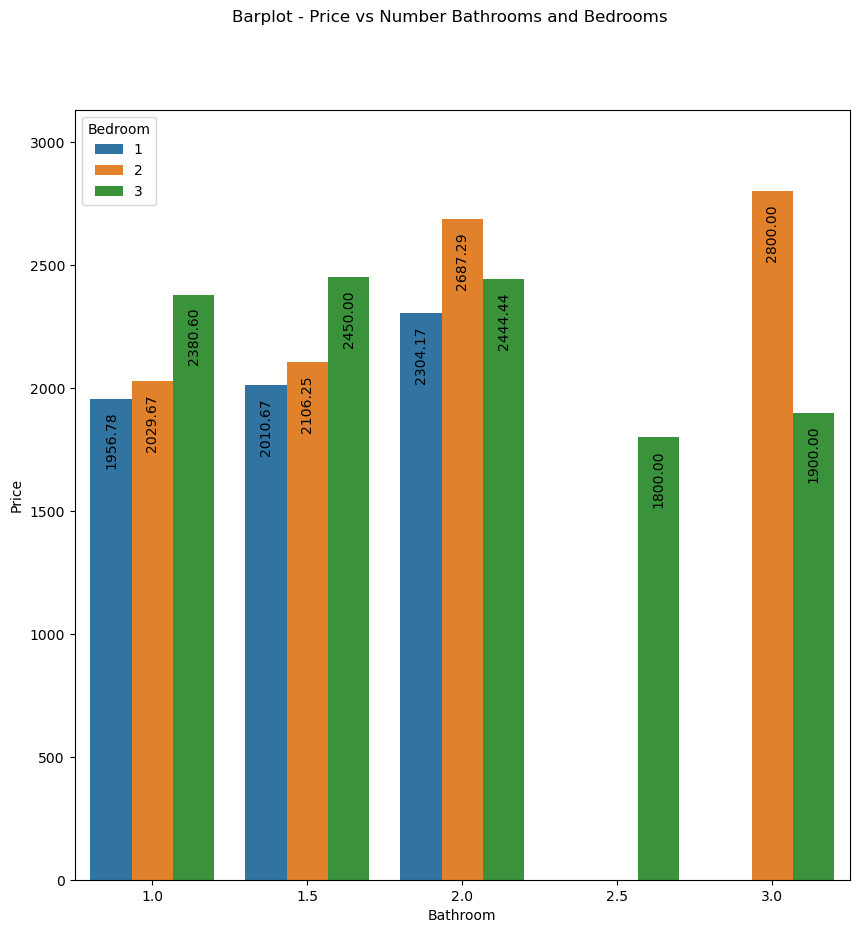

In [176]:
# Barplot - Price vs Number Bedroom, Bathroom
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle("Barplot - Price vs Number Bathrooms and Bedrooms")

g1 = sns.barplot(ax=axes, data=df_withOut_ol
                 , x=df_withOut_ol.Bathroom
                 , y=df_withOut_ol.Price, errwidth=0, hue="Bedroom")
# display value as labesl on each bar
for p in g1.patches:
    g1.annotate(format(p.get_height(), '.2f')
                , (p.get_x() + p.get_width() / 2., p.get_height())
                , ha = 'center', va = 'center'
                , rotation = 90
                , xytext = (0, -30)
                , textcoords = 'offset points')
    
plt.show()

The multi-variable boxplot above show that:
* Both 1 and 2 price consistently increases with the increase in the number of bathrooms.
* But for 3 bedroom units, those with 1.0, 1.5,2.0 bathrooms are priced higher than those with 2.5 and 3.0 bathrooms.

### Creating Correlation matrix with Heatmap

In [177]:
corr = df_withOut_ol.corr()

In [178]:
df_withOut_ol.corr().style.background_gradient(cmap='coolwarm')

,Bedroom,Bathroom,Den,Lat,Long,Price
Bedroom,1.000000,0.595724,-0.276040,-0.002073,-0.015260,0.322933
Bathroom,0.595724,1.000000,-0.096557,0.021219,-0.040010,0.419152
Den,-0.276040,-0.096557,1.000000,0.069554,-0.040159,0.098554
Lat,-0.002073,0.021219,0.069554,1.000000,-0.826082,-0.040747
Long,-0.015260,-0.040010,-0.040159,-0.826082,1.000000,-0.021527
Price,0.322933,0.419152,0.098554,-0.040747,-0.021527,1.000000


### Creating Covariance matrix

In [179]:
df1 = df_withOut_ol[['Lat', 'Long']]

In [180]:
print(df1)

            Lat       Long
0     43.581639 -79.648193
1     43.643051 -79.391643
2     43.660605 -79.378635
3     43.641087 -79.381405
4     43.652487 -79.389622
...         ...        ...
1119  43.325233 -79.802182
1120  43.445426 -79.736833
1121  43.683386 -79.309409
1122  43.653636 -79.380873
1123  43.669931 -79.375463

[777 rows x 2 columns]


In [181]:
df1.corr().round(2)

,Lat,Long
Lat,1.00,-0.83
Long,-0.83,1.00


In [182]:
tb1 = df1.cov().round(2)
tb1

,Lat,Long
Lat,0.29,-0.72
Long,-0.72,2.61


In [183]:
Total_Varience = tb1.loc['Lat','Lat'] + tb1.loc['Long','Long']
print(Total_Varience)

2.9


In [184]:
Long_Ratio = tb1.loc['Long','Long']/Total_Varience
print(Long_Ratio*100)

90.0


In [185]:
Lat_Ratio = tb1.loc['Lat','Lat']/Total_Varience
print(Lat_Ratio*100)

10.0


### Normalizatin of dataset

In [186]:
df_withOut_ol.columns

Index(['Bedroom', 'Bathroom', 'Den', 'Address', 'Lat', 'Long', 'Price'], dtype='object')

In [187]:
df_new = df_withOut_ol[['Bedroom', 'Bathroom', 'Den','Lat', 'Long', 'Price']]

In [188]:
print(df_new)

      Bedroom  Bathroom  Den        Lat       Long   Price
0           2       2.0    0  43.581639 -79.648193  2450.0
1           1       1.0    1  43.643051 -79.391643  2150.0
2           1       1.0    0  43.660605 -79.378635  1950.0
3           2       2.0    0  43.641087 -79.381405  2900.0
4           1       1.0    0  43.652487 -79.389622  1800.0
...       ...       ...  ...        ...        ...     ...
1119        3       1.0    0  43.325233 -79.802182  3000.0
1120        1       1.0    0  43.445426 -79.736833  1200.0
1121        1       1.0    0  43.683386 -79.309409  1800.0
1122        2       1.0    0  43.653636 -79.380873  2200.0
1123        1       1.0    0  43.669931 -79.375463  2150.0

[777 rows x 6 columns]


In [189]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [190]:
from sklearn.preprocessing import MinMaxScaler

In [191]:
scaler = MinMaxScaler()

In [192]:
normalized_data=scaler.fit_transform(df_new)

In [193]:
normalized_df = pd.DataFrame(normalized_data
                             , columns = ['Bedroom', 'Bathroom', 'Den','Lat', 'Long', 'Price'])

In [194]:
print(normalized_df)

     Bedroom  Bathroom  Den       Lat      Long     Price
0        0.5       0.5  0.0  0.045332  0.850100  0.606061
1        0.0       0.0  1.0  0.050004  0.856434  0.505051
2        0.0       0.0  0.0  0.051340  0.856755  0.437710
3        0.5       0.5  0.0  0.049855  0.856687  0.757576
4        0.0       0.0  0.0  0.050722  0.856484  0.387205
..       ...       ...  ...       ...       ...       ...
772      1.0       0.0  0.0  0.025826  0.846299  0.791246
773      0.0       0.0  0.0  0.034969  0.847912  0.185185
774      0.0       0.0  0.0  0.053073  0.858464  0.387205
775      0.5       0.0  0.0  0.050809  0.856700  0.521886
776      0.0       0.0  0.0  0.052049  0.856834  0.505051

[777 rows x 6 columns]


In [195]:
normalized_df.corr().style.background_gradient(cmap='coolwarm')

,Bedroom,Bathroom,Den,Lat,Long,Price
Bedroom,1.000000,0.595724,-0.276040,-0.002073,-0.015260,0.322933
Bathroom,0.595724,1.000000,-0.096557,0.021219,-0.040010,0.419152
Den,-0.276040,-0.096557,1.000000,0.069554,-0.040159,0.098554
Lat,-0.002073,0.021219,0.069554,1.000000,-0.826082,-0.040747
Long,-0.015260,-0.040010,-0.040159,-0.826082,1.000000,-0.021527
Price,0.322933,0.419152,0.098554,-0.040747,-0.021527,1.000000
